In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_theme(style="whitegrid")
%matplotlib inline

In [30]:
df = pd.read_csv('/home/najaina/data/processed/weather_global.csv')
df.tail()

,city,date,temperature,feels_like,humidity,description,wind_speed,clouds
175,London,2025-07-04,21.46,21.07,54,overcast clouds,4.63,100
176,Dubai,2025-07-04,33.96,40.96,66,clear sky,1.54,0
177,Macau,2025-07-04,28.85,34.12,79,scattered clouds,0.51,40
178,Kuala Lumpur,2025-07-04,25.49,26.26,83,few clouds,1.54,20
179,Paris,2025-07-04,20.99,20.48,51,clear sky,3.60,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         180 non-null    object 
 1   date         180 non-null    object 
 2   temperature  180 non-null    float64
 3   feels_like   180 non-null    float64
 4   humidity     180 non-null    int64  
 5   description  180 non-null    object 
 6   wind_speed   180 non-null    float64
 7   clouds       180 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 11.4+ KB


In [32]:
df.shape

(180, 8)

In [33]:
df.describe()

,temperature,feels_like,humidity,wind_speed,clouds
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,30.492333,32.985278,57.994444,4.474278,37.083333
std,6.241554,7.138509,27.059937,2.558228,37.256903
min,17.930000,17.970000,9.000000,0.000000,0.000000
25%,27.310000,26.890000,36.000000,2.800000,6.000000
50%,29.760000,35.160000,52.500000,4.070000,20.000000
75%,35.330000,37.490000,84.000000,6.170000,75.000000
max,41.840000,45.960000,94.000000,8.750000,100.000000


### Temperature Trend by city

In [34]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values(by='date')

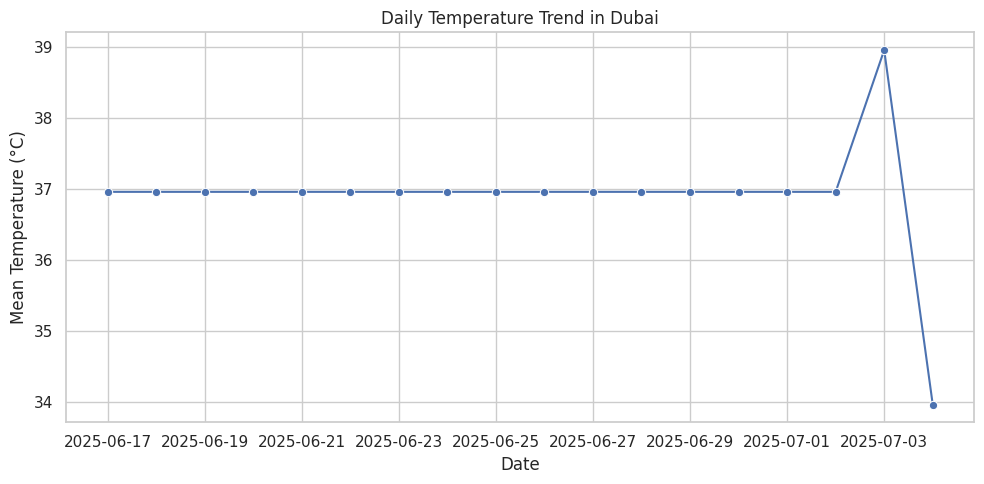

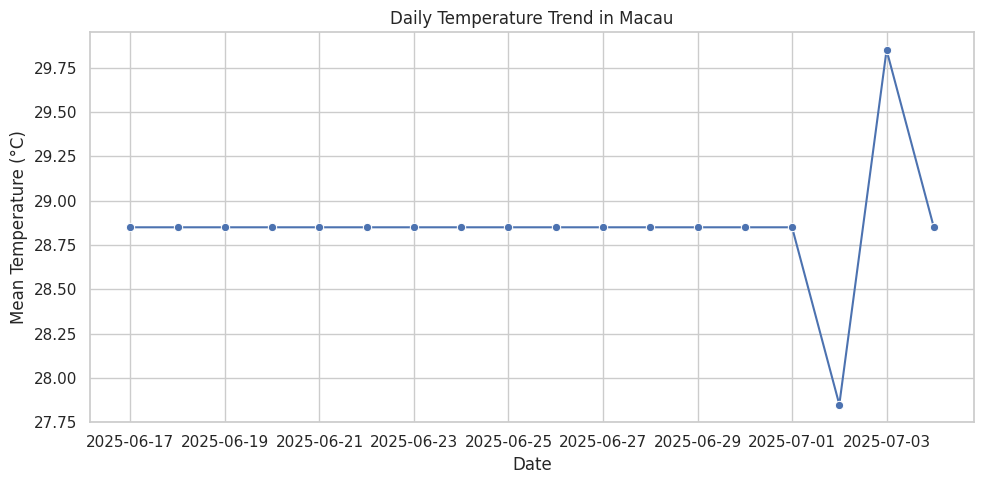

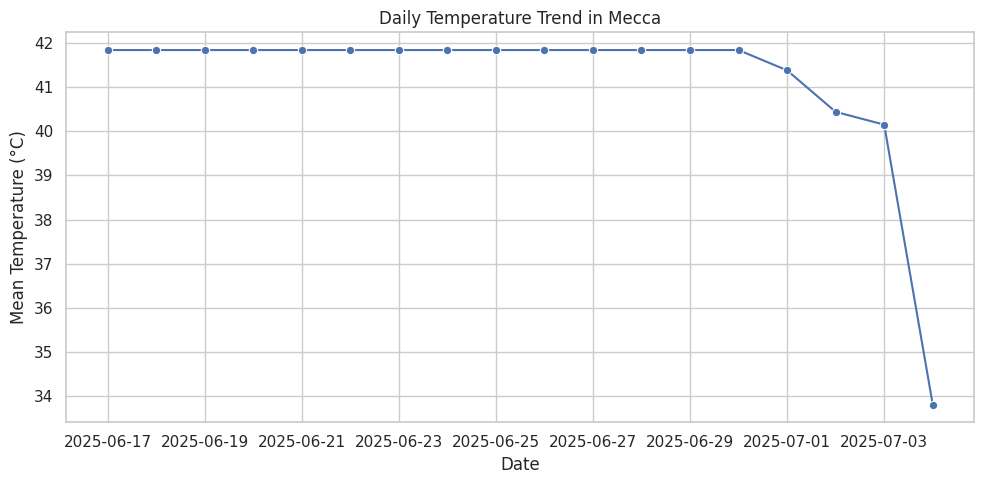

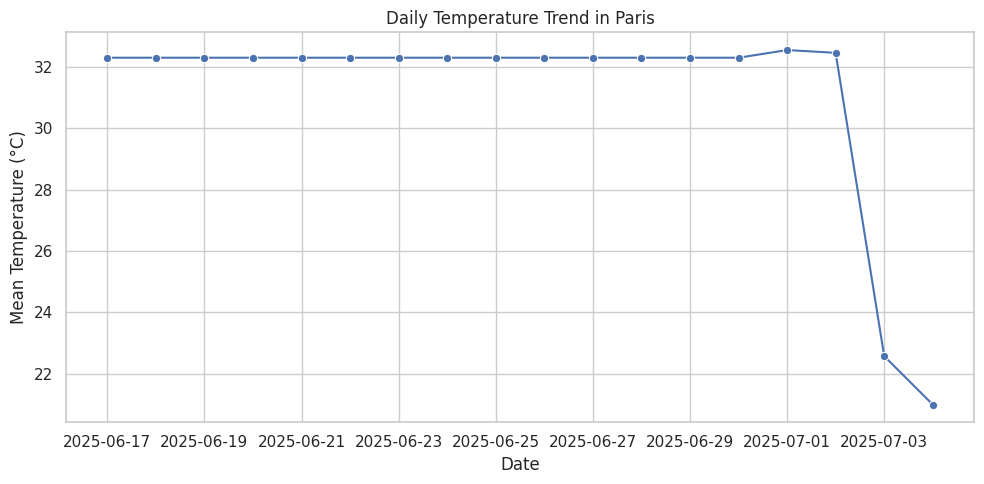

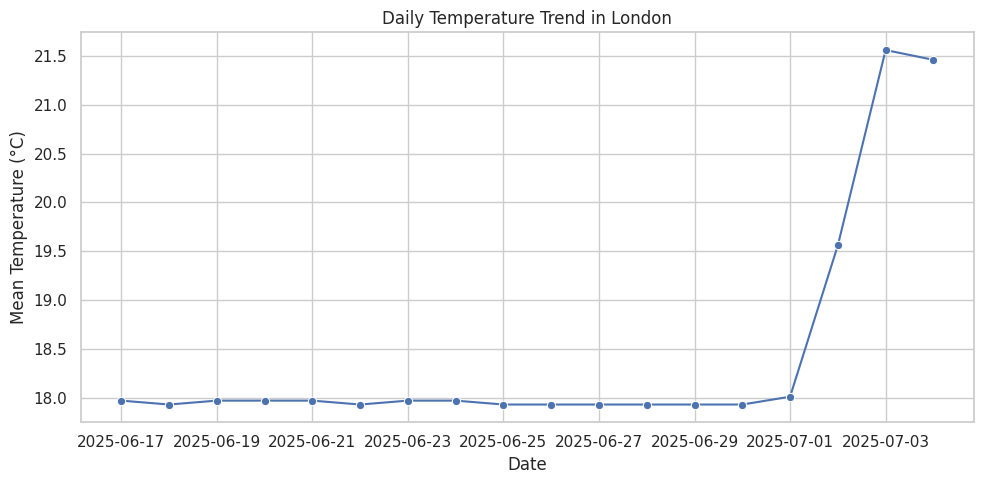

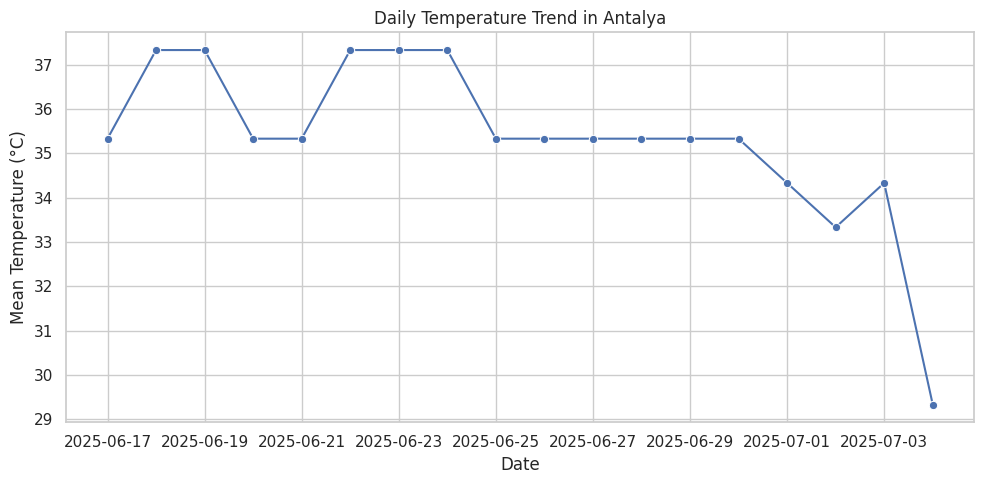

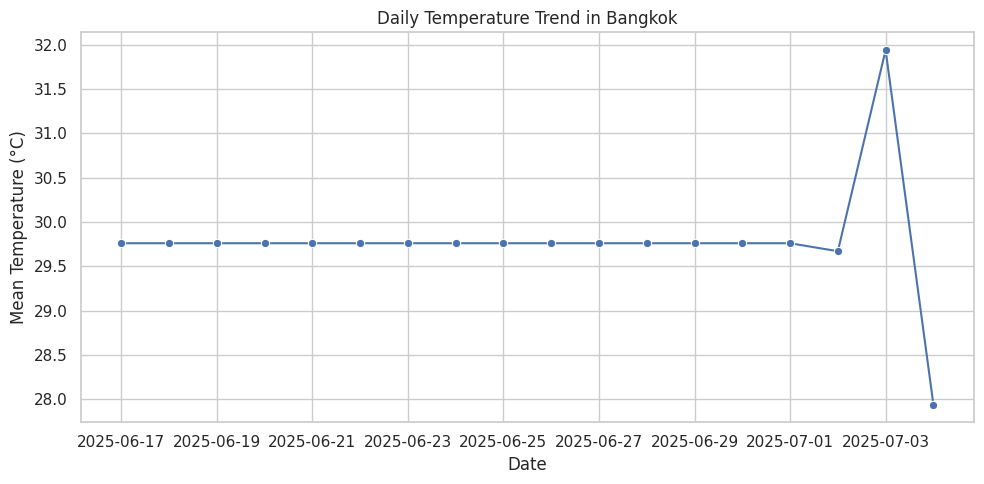

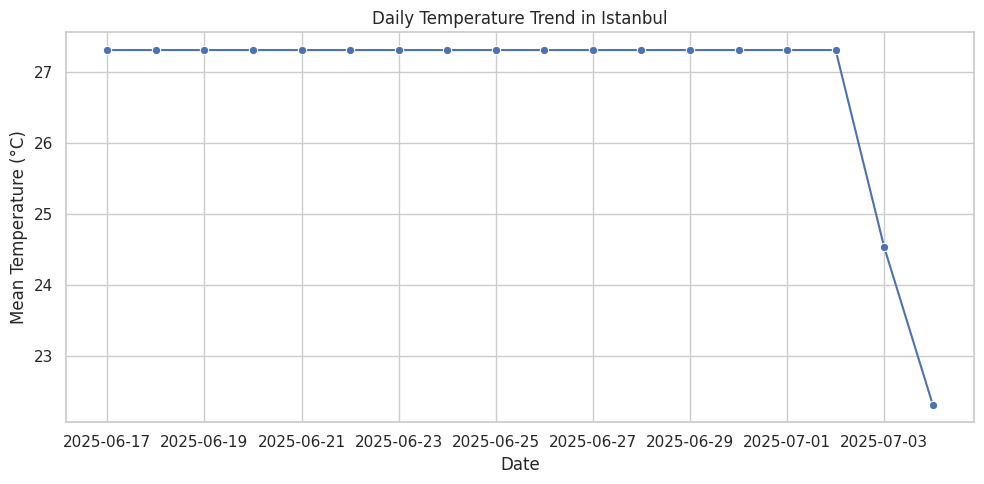

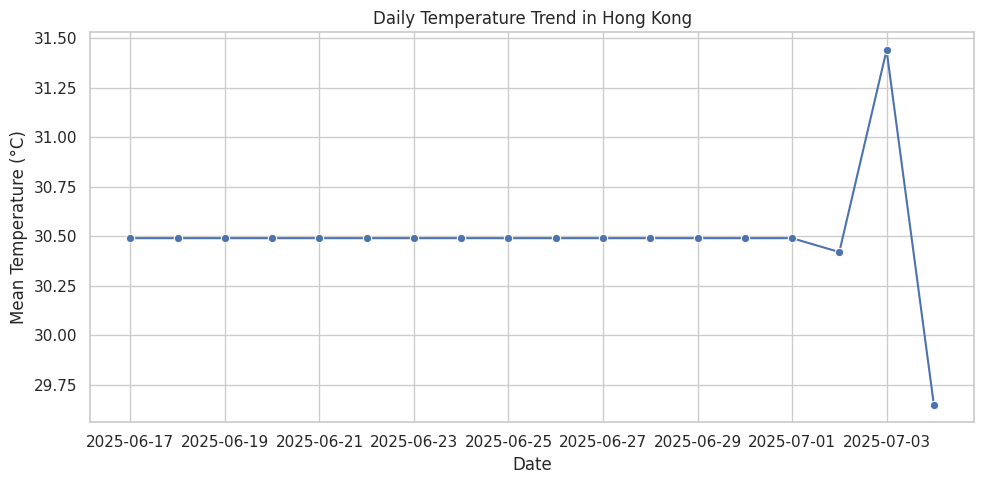

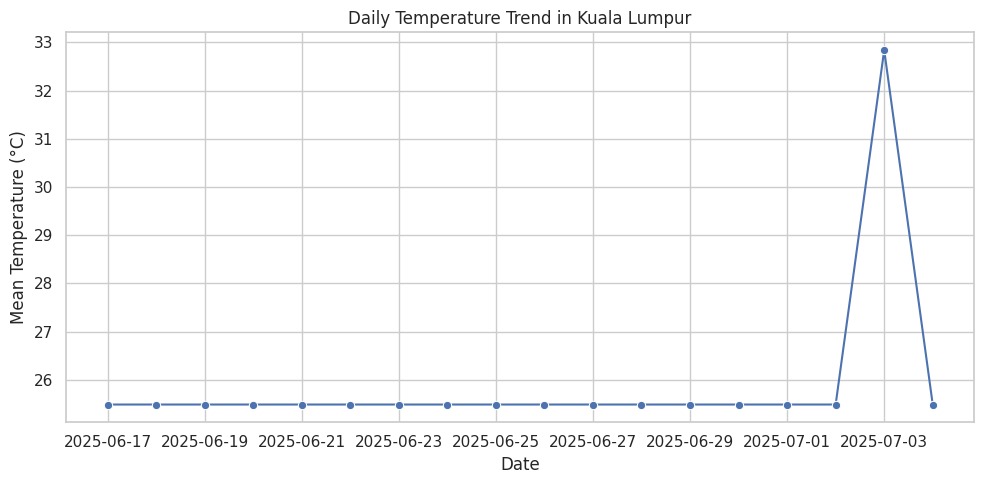

In [36]:
# Group and generate plot by city
for city in df['city'].unique():
    city_df = df[df['city'] == city]

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=city_df, x="date", y="temperature", marker="o")
    plt.title(f"Daily Temperature Trend in {city}")
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature (°C)")
    plt.grid(True)
    plt.tight_layout()

    plt.show()

### Side by side comparison between temperature and apparent temperature for the last few days for each city

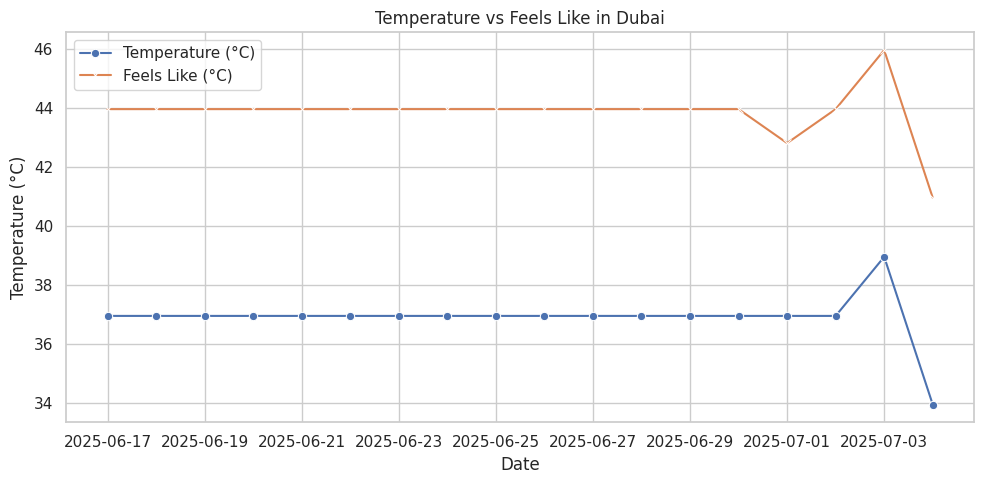

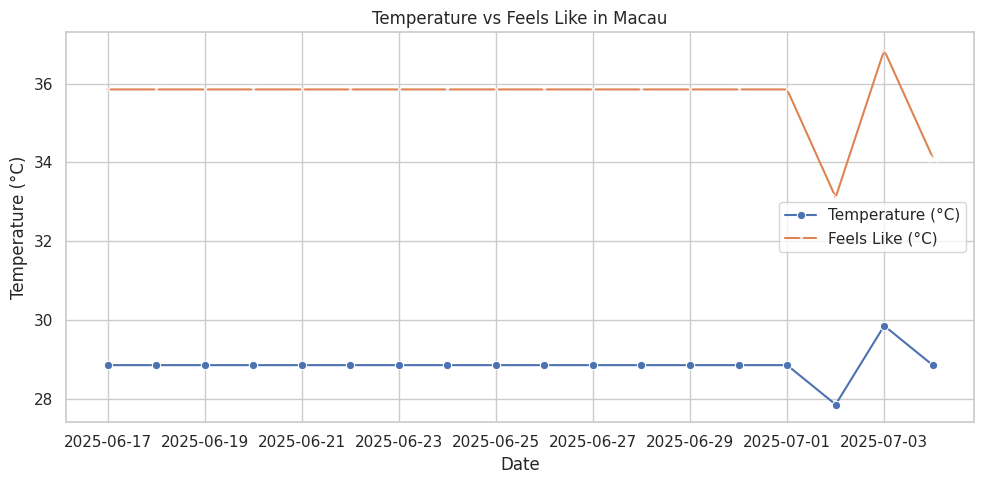

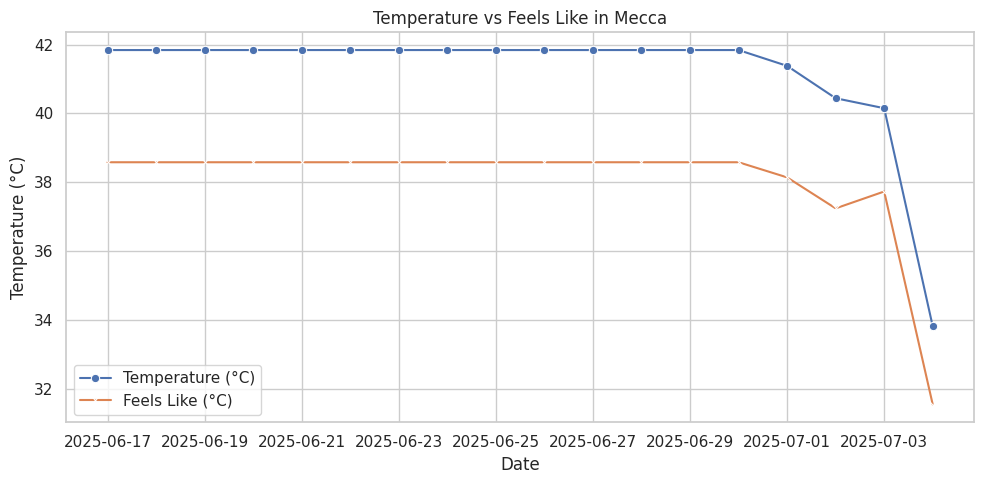

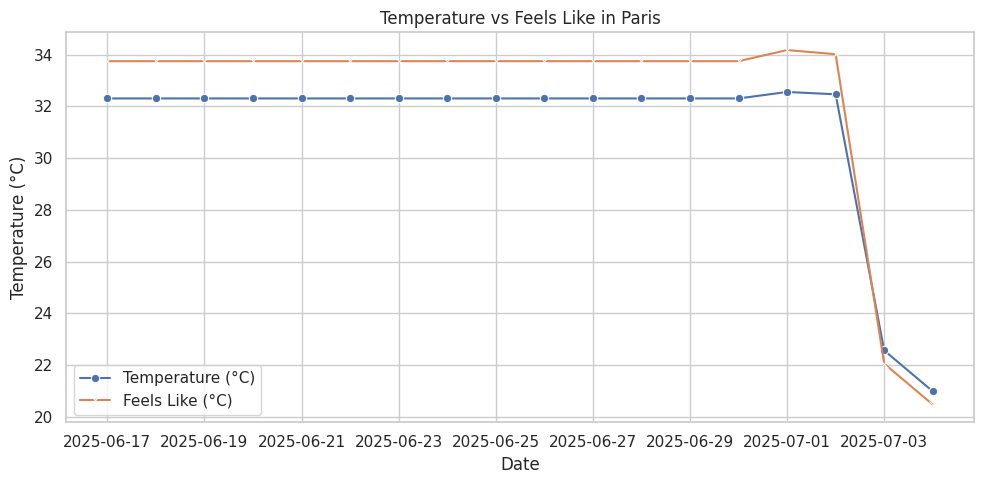

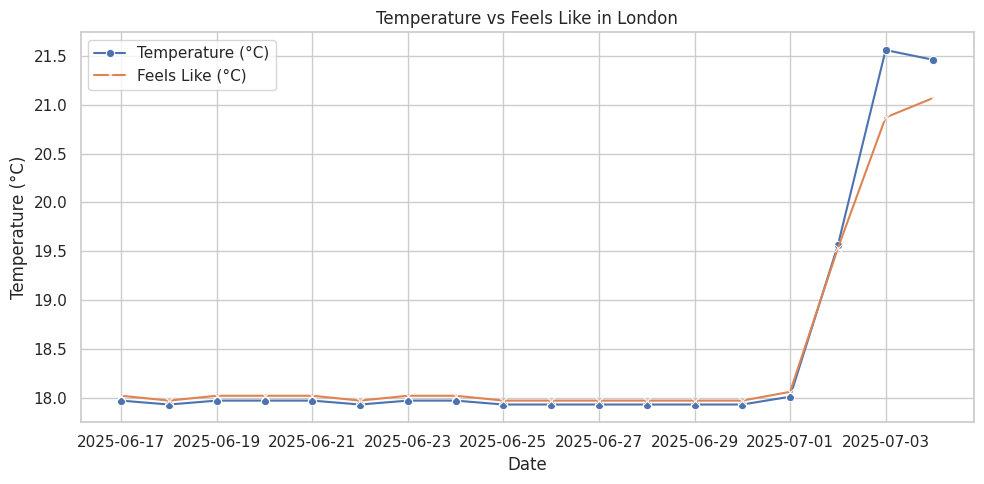

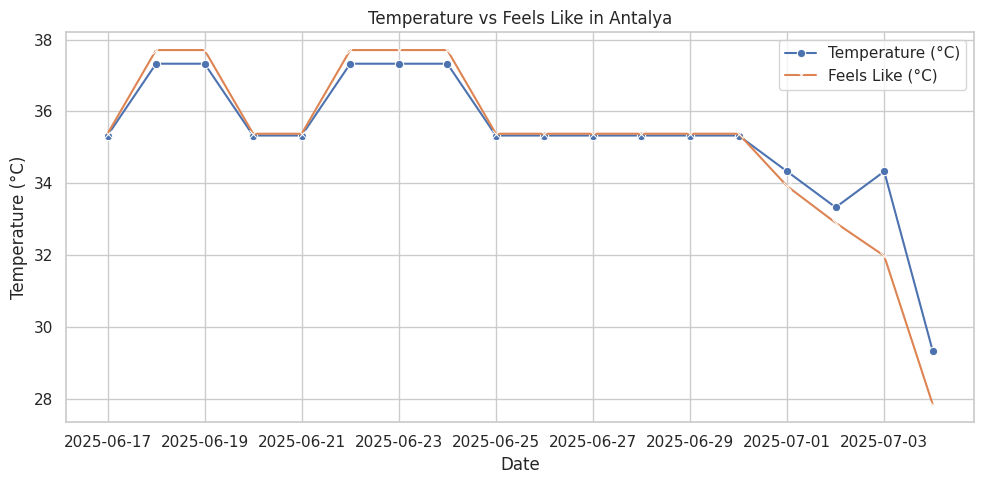

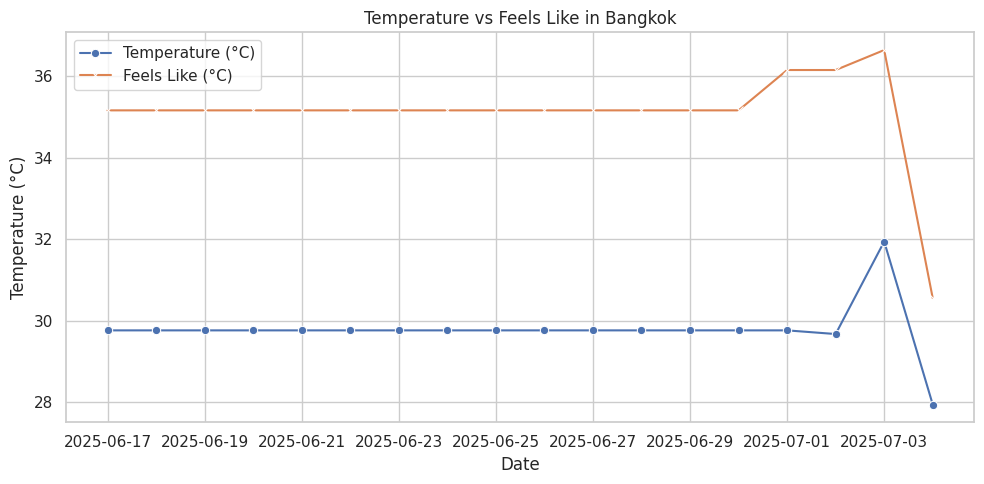

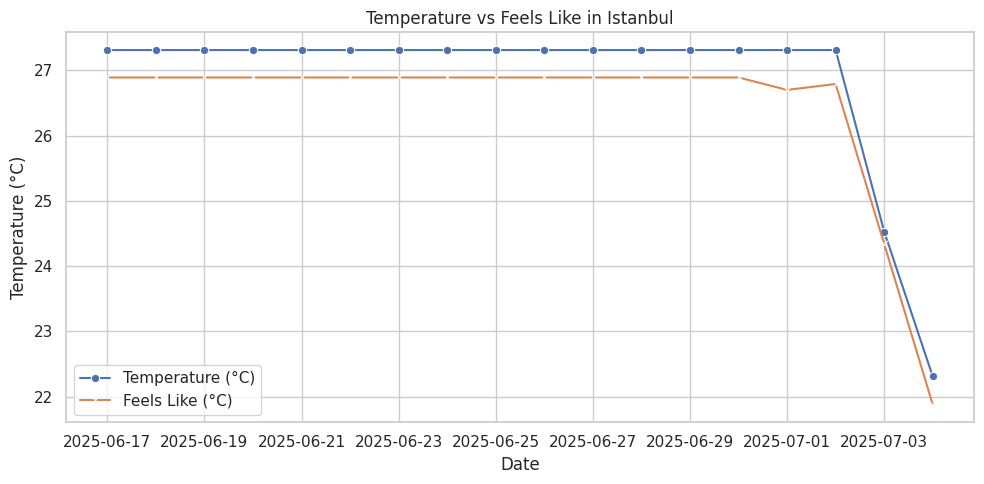

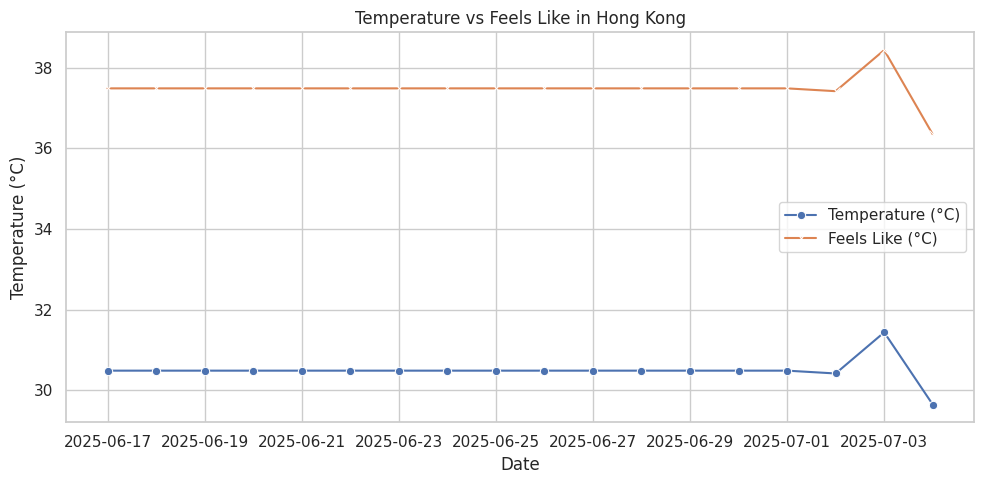

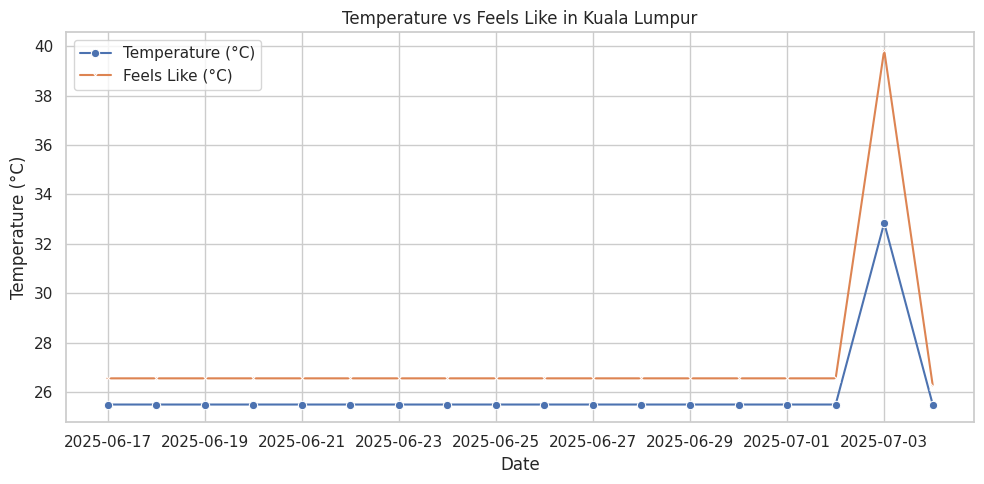

In [39]:
for city in df['city'].unique():
    city_df = df[df['city'] == city]

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=city_df, x="date", y="temperature", label="Temperature (°C)", marker="o")
    sns.lineplot(data=city_df, x="date", y="feels_like", label="Feels Like (°C)", marker="x")

    plt.title(f"Temperature vs Feels Like in {city}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()